<a href="https://colab.research.google.com/github/JCTSilva/FinalProject_IMT_CANCER/blob/main/Notebooks/mouth_oropharynx_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição desse notebook:**

*   Carregamento dos dados referentes a boca e a orofaringe ainda em seu estado mais bruto
*   União dos dados, a fim de possibilitar ao modelo futuro mais informação de treinamento



# **Bibliotecas**

## **Instalação**

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.2 MB/s 


## **Importação**

In [ ]:
import pandas as pd
import numpy as np
import gdown

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pickle # Save models
seed = 10 # seed for the random state

In [ ]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

In [ ]:
# Classification
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn import tree

# **Funções pré-programadas**

## **Instalação**

In [ ]:
# Install the file with the file ID in Google Drive
id = "1ka06g2-8j1Iykx9fzGT7tVFwQZYHu6IH"
output = "functions.py"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ka06g2-8j1Iykx9fzGT7tVFwQZYHu6IH
To: /content/functions.py
100%|██████████| 20.3k/20.3k [00:00<00:00, 20.0MB/s]


'functions.py'

## **Importação**

In [ ]:
from functions import *

# **Dados**

## **Boca**

### **Instalação**

In [ ]:
# Install the file with the file ID in Google Drive
id = "1H5RJuaMOIyhdDT45_T1J4T7_G4IgZ8FS"
output = "cancer_boca.csv"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1H5RJuaMOIyhdDT45_T1J4T7_G4IgZ8FS
To: /content/cancer_boca.csv
100%|██████████| 2.07M/2.07M [00:00<00:00, 48.3MB/s]


'cancer_boca.csv'

### **Importação**

In [ ]:
dfb = pd.read_csv('/content/cancer_boca.csv', index_col='Unnamed: 0')
dfb.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,...,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,2000-02-08,1,...,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2018-03-13,2,...,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai
2,2,65,1,BA,SP,3550308,SAO PAULO,2,2013-06-24,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
3,2,72,2,SP,SP,3550308,SAO PAULO,2,2009-06-10,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo
4,1,78,2,SP,SP,3528502,MAIRIPORA,2,2016-05-10,2,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,2,São Paulo


## **Orofaringe**

### **Instalação**

In [ ]:
# Install the file with the file ID in Google Drive
id = "1KM2jsBiHOswhF0QLTuN0s79-Xd5YapZ-"
output = "cancer_orofaringe.csv"
gdown.download(id=id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1KM2jsBiHOswhF0QLTuN0s79-Xd5YapZ-
To: /content/cancer_orofaringe.csv
100%|██████████| 2.12M/2.12M [00:00<00:00, 59.1MB/s]


'cancer_orofaringe.csv'

### **Importação**

In [ ]:
dfo = pd.read_csv('/content/cancer_orofaringe.csv', index_col='Unnamed: 0')
dfo.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,...,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,2,62,1,SP,SP,3550308,SAO PAULO,2,2004-08-11,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
1,2,54,1,SP,SP,3536802,PEDRA BELA,2,2006-07-11,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
2,9,57,1,SP,SP,3550308,SAO PAULO,2,2006-03-13,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
3,9,50,1,SP,SP,3550308,SAO PAULO,2,2006-03-01,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo
4,9,63,1,SP,SP,3550308,SAO PAULO,2,2007-04-20,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo


## **União**

In [ ]:
df = pd.concat([dfb, dfo], ignore_index=True)
df.shape

(12542, 60)

# **Análise das informações básicas dos dados**

In [ ]:
data = df.copy() 

In [ ]:
data.head(3)

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,DIAGPREV,...,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT2,CIDADEH
0,9,74,2,PE,SP,3546900,SANTA LUCIA,2,2000-02-08,1,...,0,NaN,NaN,NaN,NaN,3503208,80703,CARCINOMA ESCAMOCELULAR SOE,1,Araraquara
1,2,69,2,MG,SP,3556503,VARZEA PAULISTA,2,2018-03-13,2,...,0,NaN,NaN,NaN,NaN,3525904,80703,CARCINOMA ESCAMOCELULAR SOE,1,Jundiai
2,2,65,1,BA,SP,3550308,SAO PAULO,2,2013-06-24,1,...,0,NaN,NaN,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,1,São Paulo


In [ ]:
data.shape

(12542, 60)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12542 entries, 0 to 12541
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESCOLARI    12542 non-null  int64  
 1   IDADE       12542 non-null  int64  
 2   SEXO        12542 non-null  int64  
 3   UFNASC      12542 non-null  object 
 4   UFRESID     12542 non-null  object 
 5   IBGE        12542 non-null  int64  
 6   CIDADE      12542 non-null  object 
 7   CATEATEND   12542 non-null  int64  
 8   DTCONSULT   12542 non-null  object 
 9   DIAGPREV    12542 non-null  int64  
 10  DTDIAG      12542 non-null  object 
 11  BASEDIAG    12542 non-null  int64  
 12  TOPO        12542 non-null  object 
 13  TOPOGRUP    12542 non-null  object 
 14  DESCTOPO    12542 non-null  object 
 15  MORFO       12542 non-null  int64  
 16  DESCMORFO   12542 non-null  object 
 17  EC          12542 non-null  object 
 18  ECGRUP      12542 non-null  object 
 19  DTTRAT      12542 non-nul

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ESCOLARI,12542.0,4.100781e+00,2.866548,1.0,2.0,3.0,5.0,9.0
IDADE,12542.0,5.907886e+01,10.740812,11.0,52.0,58.0,66.0,100.0
SEXO,12542.0,1.159943e+00,0.366567,1.0,1.0,1.0,1.0,2.0
IBGE,12542.0,3.551667e+06,261966.976259,1100015.0,3519303.0,3543402.0,3550308.0,5300108.0
CATEATEND,12542.0,2.000000e+00,0.000000,2.0,2.0,2.0,2.0,2.0
DIAGPREV,12542.0,1.517940e+00,0.499698,1.0,1.0,2.0,2.0,2.0
BASEDIAG,12542.0,2.996811e+00,0.213915,1.0,3.0,3.0,3.0,9.0
MORFO,12542.0,8.070308e+04,1.625024,80703.0,80703.0,80703.0,80703.0,80743.0
NAOTRAT,12542.0,7.661776e+00,1.238720,1.0,8.0,8.0,8.0,8.0
CIRURGIA,12542.0,4.149258e-01,0.492729,0.0,0.0,0.0,1.0,1.0


# **Análise da distribuição dos dados por meio de:**

## **Anos**

### **Geral**

In [ ]:
import plotly.graph_objects as go

years = np.sort(data.ANODIAG.unique())

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=data.ANODIAG.value_counts().sort_index(),
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de pessoas ao longo dos anos'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de pessoas', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

### **Sexo**

In [258]:
import plotly.graph_objects as go

years = np.sort(data.ANODIAG.unique())

contagens_1 = data.query('SEXO == 1').ANODIAG.value_counts().sort_index()
contagens_2 = data.query('SEXO == 2').ANODIAG.value_counts().sort_index()


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=contagens_1,
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=contagens_2,
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))

fig.update_layout(title = dict(text = 'Quantidade de pessoas ao longo dos anos'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Quantidade de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  bargroupgap=0.1, # gap between bars of the same location coordinate.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

### **Tempo em dias entre a consulta e o diagnóstico**

**Geral**

In [ ]:
import plotly.graph_objects as go

years = np.sort(data.ANODIAG.unique())
#Pessoas sem dignóstico prévio e sem tratamento
media = data[data.DIAGPREV == 1].groupby('ANODIAG').median()['CONSDIAG'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=media,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Tempos médio entre a consulta e o diagnótico ao longo dos anos [Dias/Ano]'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Média em dias', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

**Cidades**

In [257]:
import plotly.graph_objects as go

years = np.sort(data.ANODIAG.unique())

#Pessoas sem dignóstico prévio e sem tratamento
dfdiag = data[data.DIAGPREV == 1]
sao = dfdiag.loc[dfdiag.CIDADEH == 'São Paulo'].groupby('ANODIAG').median()['CONSDIAG'].values
bar = dfdiag.loc[dfdiag.CIDADEH == 'Barretos'].groupby('ANODIAG').median()['CONSDIAG'].values
jau = dfdiag.loc[dfdiag.CIDADEH == 'Jau'].groupby('ANODIAG').median()['CONSDIAG'].values
sjr = dfdiag.loc[dfdiag.CIDADEH == 'São José do Rio Preto'].groupby('ANODIAG').median()['CONSDIAG'].values
rbp = dfdiag.loc[dfdiag.CIDADEH == 'Ribeirão Preto'].groupby('ANODIAG').median()['CONSDIAG'].values


fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=sao,
                name='São Paulo',
                marker_color='rgb(0, 0, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=sjr,
                name='São José do Rio Preto',
                marker_color='rgb(0, 255, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=rbp,
                name='Ribeirão Preto',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Tempo médio entre consulta e diagnóstico nas 5 cidades com mais dados'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Tempo médio em dias', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  height = 800,
                  plot_bgcolor='darkgray'
                  )
fig.show()

### **Tempo em dias entre a consulta e o início do tratamento**

**Geral**

In [217]:
import plotly.graph_objects as go

years = np.sort(data.ANODIAG.unique())
#Pessoas sem dignóstico prévio e sem tratamento
media = data[data.DIAGPREV == 1].groupby('ANODIAG').median()['TRATCONS'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=media,
                marker_color='rgb(0,0,0)'
                ))

fig.update_layout(title = dict(text = 'Tempos médio entre a consulta e o diagnótico ao longo dos anos [Dias/Ano]'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Média em dias', titlefont_size=16, tickfont_size=14),
                  barmode='group',
                  bargap=0.15, # gap between bars of adjacent location coordinates.
                  plot_bgcolor='lightgrey'
                  )
fig.show()

**Cidades**

In [256]:
import plotly.graph_objects as go

years = np.sort(data.ANODIAG.unique())

#Pessoas sem dignóstico prévio e sem tratamento
dfdiag = data[data.DIAGPREV == 1]
sao = dfdiag.loc[dfdiag.CIDADEH == 'São Paulo'].groupby('ANODIAG').median()['TRATCONS'].values
bar = dfdiag.loc[dfdiag.CIDADEH == 'Barretos'].groupby('ANODIAG').median()['TRATCONS'].values
sjr = dfdiag.loc[dfdiag.CIDADEH == 'São José do Rio Preto'].groupby('ANODIAG').median()['TRATCONS'].values
rbp = dfdiag.loc[dfdiag.CIDADEH == 'Ribeirão Preto'].groupby('ANODIAG').median()['TRATCONS'].values


fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=sao,
                name='São Paulo',
                marker_color='rgb(0, 0, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=bar,
                name='Barretos',
                marker_color='rgb(0, 255, 0)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=sjr,
                name='São José do Rio Preto',
                marker_color='rgb(0, 255, 255)'
                ))

fig.add_trace(go.Scatter(x=years,
                y=rbp,
                name='Ribeirão Preto',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Tempo médio entre consulta e diagnóstico nas 5 cidades com mais dados'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Tempo médio em dias', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

## **Faixas etárias**

In [238]:
data.query('SEXO == 2').FAIXAETAR.value_counts().sort_index()

10-19      1
20-29     16
30-39     48
40-49    249
50-59    536
60-69    565
70+      591
Name: FAIXAETAR, dtype: int64

In [254]:
import plotly.graph_objects as go

years = np.sort(data.FAIXAETAR.unique())

contagens_1 = data.query('SEXO == 1').FAIXAETAR.value_counts().sort_index()
contagens_2 = data.query('SEXO == 2').FAIXAETAR.value_counts().sort_index()


fig = go.Figure()
fig.add_trace(go.Scatter(x=years,
                y=100*(contagens_1/data.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Scatter(x=years,
                y=100*(contagens_2/data.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas por faixa etaria'),
                  xaxis = dict(title='Ano', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()


## **Cidades do país**

In [276]:
import plotly.graph_objects as go

years = data.CIDADEH.value_counts().index

contagens_1 = data.query('SEXO == 1').CIDADEH.value_counts().values
contagens_2 = data.query('SEXO == 2').CIDADEH.value_counts().values


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_1/data.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_2/data.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas por cidade em que foi tratada'),
                  xaxis = dict(title='Cidade do hospital', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

## **Estadiamento clínico**

In [277]:
import plotly.graph_objects as go

years = data.ECGRUP.value_counts().index

contagens_1 = data.query('SEXO == 1').ECGRUP.value_counts().values
contagens_2 = data.query('SEXO == 2').ECGRUP.value_counts().values


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_1/data.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_2/data.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas por estadiamento clínico'),
                  xaxis = dict(title='Grupo de estadiamento clínico', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

### **Última informação**

In [270]:
data.query('SEXO == 1').ULTINFO.value_counts().sort_index().values

array([ 434, 2118, 6254, 1730])

In [279]:
import plotly.graph_objects as go

# 1 – Alive with cancer; 2 – Alive, without other specifications;
# 3 – Death by cancer; 4 – Death by other causes, without other specifications
years = ['1-Alive with cancer', '2-Alive, without other specifications', '3-Death by cancer', '4-Death by other causes, without other specifications']

contagens_1 = data.query('SEXO == 1').ULTINFO.value_counts().sort_index().values
contagens_2 = data.query('SEXO == 2').ULTINFO.value_counts().sort_index().values


fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_1/data.query('SEXO == 1').shape[0]),
                name='Homem',
                marker_color='rgb(0, 0, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=100*(contagens_2/data.query('SEXO == 2').shape[0]),
                name='Mulher',
                marker_color='rgb(255, 0, 255)'
                ))


fig.update_layout(title = dict(text = 'Porcentagem de pessoas de cada sexo por última informação'),
                  xaxis = dict(title='Última informação', titlefont_size=16, tickfont_size=14),
                  yaxis = dict(title='Porcentagem de pessoas', titlefont_size=16, tickfont_size=14),
                  legend=dict(x=1, y=1, bgcolor='rgba(255, 255, 255, 0)', 
                  bordercolor='rgba(255, 255, 255, 0)'),
                  plot_bgcolor='darkgray',
                  height = 800
                  )
fig.show()

## **Análise da correlação das informações**

### **Última informação vs outras variáveis**

In [286]:
df_corr = data.copy()
df_corr.drop(columns=['CATEATEND', 'HORMOAPOS', 'TMOAPOS', 'IMUNOAPOS'], inplace=True)
abs(df_corr.corr().ULTINFO).sort_values(ascending=False)

ULTINFO       1.000000
ANODIAG       0.149068
CIRURGIA      0.109888
SEXO          0.086825
IDADE         0.084937
NAOTRAT       0.058727
HABILIT2      0.052127
DIAGPREV      0.049610
RECNENHUM     0.033586
RRAS          0.029790
ESCOLARI      0.024743
OUTROAPOS     0.023672
RADIOAPOS     0.023594
TMO           0.022669
RECREGIO      0.022472
RECLOCAL      0.021950
RADIO         0.021421
DIAGTRAT      0.020617
OUTROS        0.017426
IBGEATEN      0.016692
NENHUMAPOS    0.016465
CIRURAPOS     0.015409
MORFO         0.012086
CIDO          0.012086
CONSDIAG      0.011372
QUIMIO        0.009071
RECDIST       0.007391
QUIMIOAPOS    0.006277
BASEDIAG      0.005681
IBGE          0.004924
TRATCONS      0.001278
Name: ULTINFO, dtype: float64

### **Todas vs Todas**

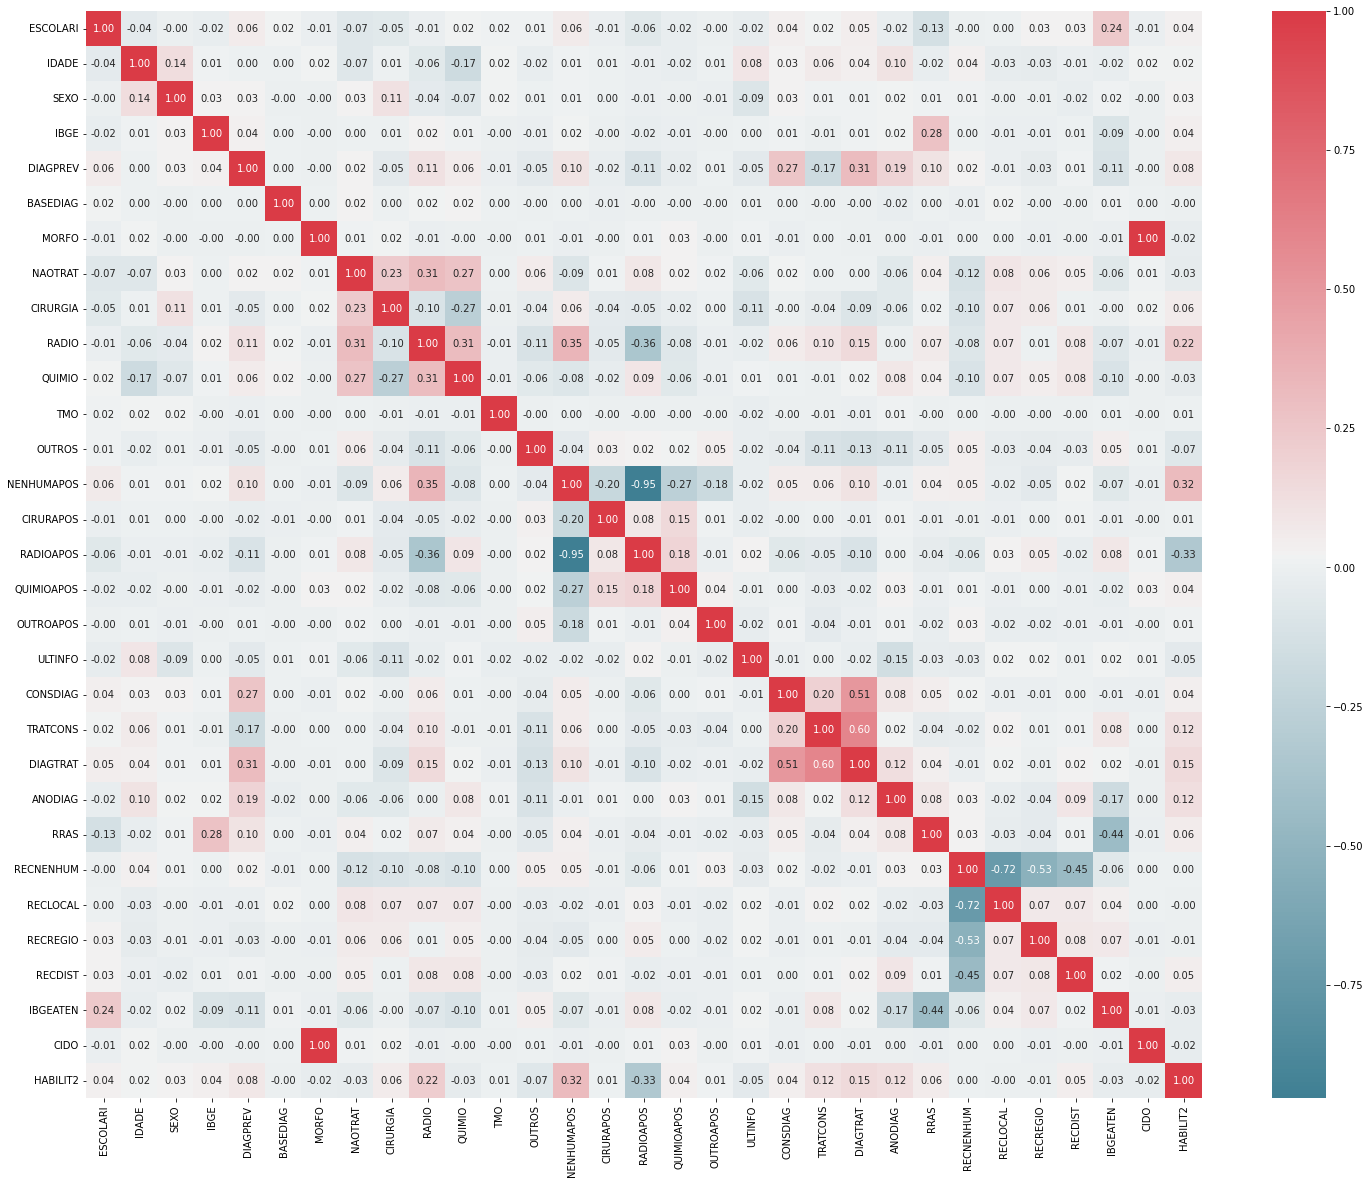

In [287]:
fig, ax = plt.subplots(figsize = (25, 20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(df_corr.corr(), cmap = colormap, annot = True, fmt = '.2f')
fig.show()

# **Análise de dados ausentes** RETOMAR AQUI

Now let's see the amount of missing values per column, we have 17 columns with more than 50% of missing data, being 6 with all missing values, if we want to use any of these for the machine learning models, it will be necessary to treat the missing values, placing 0 or some string that indicates that the value is missing, for example. 

Another option is not using the columns in the analysis, we will see later in this project the proposed solutions to solve this problem.

In [ ]:
missing = data.isna().sum().sort_values(ascending=False)
prop = missing[missing > 0]/data.shape[0]
prop

REC04       0.999362
REC03       0.996173
REC02       0.985489
REC01       0.931111
DIAGTRAT    0.089380
TRATCONS    0.089061
DRS         0.041221
CONSDIAG    0.001674
dtype: float64

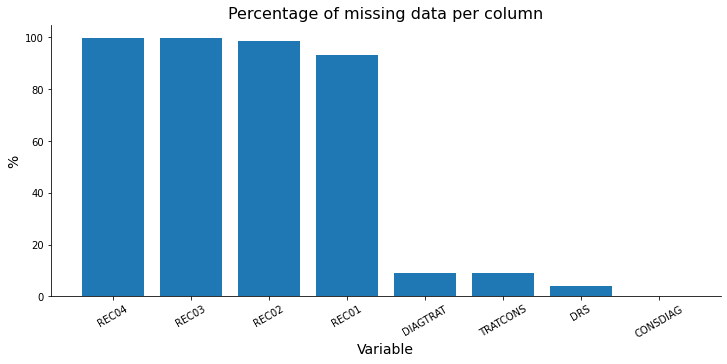

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(height = prop*100, x=prop.index)
plt.xlabel('Variable', size=14)
plt.ylabel('%', size=14)
plt.title('Percentage of missing data per column', size=16)
plt.xticks(rotation=30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# REC04 - Local da recidiva/metástase. Formato: C99
data[data['REC04'].isna() == False]['REC04'].shape

(8,)

In [ ]:
# META04 - Metástase. Formato: C99
data[data['REC03'].isna() == False]['REC03'].shape

(48,)

In [ ]:
# REC02 - Local da recidiva/metástase. Formato: C99
data[data['REC02'].isna() == False]['REC02'].shape

(182,)

In [ ]:
# REC01 - Local da recidiva/metástase. Formato: C99
data[data['REC01'].isna() == False]['REC01'].shape

(864,)

In [ ]:
# DIAGTRAT - Diferença em dias entre as datas de tratamento e diagnóstico
data[data['DIAGTRAT'].isna() == False]['DIAGTRAT'].shape

(11421,)

In [ ]:
# TRATCONS - Diferença em dias entre as datas de consulta e tratamento
data[data['TRATCONS'].isna() == False]['TRATCONS'].shape

(11425,)

In [ ]:
# DRS - DRS 
data[data['DRS'].isna() == False]['DRS'].shape

(12025,)

In [ ]:
# ULTINFO - Última informação do paciente
data[data['CONSDIAG'].isna() == False]['CONSDIAG'].shape 

(12521,)

## **Columns analysis**

In this section, the columns will be analyzed individually, with the aim of examining each one of them and obtaining a function that will be used in the data before starting the study with the machine learning models.

The columns were divided according to the type of each one, resulting in the categories: dates, numeric categories, letters categories, numbers, strings, letters and numbers categories.

Columns with unique values will be dropped from the dataset in the function called `variables_preprocessing`. Another treatment that will be done in the columns is the filling of string columns with missing values with ** Sem informação **, being the columns:

* `META01`;

* `META02`;

* `META03`;

* `META04`;

* `REC01`;

* `REC02`;

* `REC03`.

The `DRS` column will have the missing values filled with 0, after using the split method to obtain only the numbers in this column.

We also excluded from the data `ECGRUP` with X and Y values and only selected morphologies 81403 and `comportamento` 3.

From the column `UFRESID` will be selected the data for SP state. Finally, the columns that were dropped from the dataset, because they have unique values, only NaN values or because they are descriptions of the disease, are the following:

* `UFNASC`;

* `CIDADE`;

* `DESCTOPO`;

* `DESCMORFO`;

* `REC04`.

> Check the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

In [ ]:
df_aux = read_csv(path, drop_id=True)

NameError: ignored

### **Dates**

In [ ]:
# #NULL! to NaN
df_aux.loc[df_aux.DTRECIDIVA == '#NULL!', 'DTRECIDIVA'] = np.nan
df_aux.loc[df_aux.DTULTINFO == '#NULL!', 'DTULTINFO'] = np.nan
df_aux.loc[df_aux.DTTRAT == '#NULL!', 'DTTRAT'] = np.nan

*   **DTCONSULT**: Data da 1ª consulta (date = 10). Formato: DD/MM/YYYY	
*   **DTDIAG**: Data do diagnóstico (date = 10). Formato: DD/MM/YYYY
*   **DTTRAT**: Data de inicio do tratamento (date = 10). Formato: DD/MM/YYYY	
*   **DTULTINFO**: Data da última informação do paciente (date = 10). Formato: DD/MM/YYYY
*   **DTRECIDIVA**: Data da última ocorrência de recidiva (date = 10). Formato: DD/MM/YYYY

In [ ]:
# Data - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
dates = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA']
df_aux[dates].isna().sum()

In [ ]:
(df_aux[dates].isna().sum()/df_aux.shape[0])*100

In [ ]:
df_aux[dates].head(3)

### **Numerical categories**

*   **SEXO**: Sexo do paciente (int = 1). 

      1 – MASCULINO

      2 – FEMININO

In [ ]:
df_aux.SEXO.value_counts()

*   **ESCOLARI**: Código para escolaridade do paciente (int = 1).

      1 – ANALFABETO

      2 – ENS. FUND. INCOMPLETO

      3 – ENS. FUND. COMPLETO

      4 – ENSINO MÉDIO

      5 – SUPERIOR

      9 – IGNORADA

In [ ]:
df_aux.ESCOLARI.value_counts()

*   **CATEATEND**: Categoria de atendimento ao diagnóstico (int = 1). 

      1 - CONVENIO

      2 - SUS

      3 – PARTICULAR

      9 – SEM INFORMAÇÃO

In [ ]:
df_aux.CATEATEND.value_counts()

*   **DIAGPREV**: Diagnóstico e tratamento anterior (int = 1).

      1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
      
      2 – COM DIAGNÓSTICO / SEM TRATAMENTO

In [ ]:
df_aux.DIAGPREV.value_counts()

*   **NAOTRAT**: Código da razão para não realização do tratamento (int = 1).
      
      1 – RECUSA DO TRATAMENTO
      
      2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
      
      3 – OUTRAS DOENÇAS ASSOCIADAS
      
      4 – ABANDONO DE TRATAMENTO
      
      5 – OBITO POR CANCER
      
      6 – OBITO POR OUTRAS CAUSAS, SOE
      
      7 – OUTRAS
      
      8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
      
      9 – SEM INFORMAÇÃO

In [ ]:
df_aux.NAOTRAT.value_counts()

*   **NENHUM**: Tratamento recebido no hospital = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURGIA**: Tratamento recebido no hospital = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIO**: Tratamento recebido no hospital = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIO**: Tratamento recebido no hospital = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMONIO**: Tratamento recebido no hospital = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMO**: Tratamento recebido no hospital = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNO**: Tratamento recebido no hospital = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROS**: Tratamento recebido no hospital = outros (int = 1). 0 – NÃO; 1 – SIM

In [ ]:
df_aux.NENHUM.unique()

In [ ]:
df_aux.CIRURGIA.unique()

In [ ]:
df_aux.RADIO.unique()

In [ ]:
df_aux.QUIMIO.unique()

In [ ]:
df_aux.HORMONIO.unique()

In [ ]:
df_aux.TMO.unique()

In [ ]:
df_aux.IMUNO.unique()

In [ ]:
df_aux.OUTROS.unique()

*   **NENHUMANT**: Tratamento recebido fora do hospital e antes da admissão = nenhum (int = 1). 0 – NÃO; 1 – SIM

In [ ]:
df_aux.NENHUMANT.unique()

*   **NENHUMAPOS**: Tratamento recebido fora do hospital e durante/após admissão = nenhum	(int = 1). 0 – NÃO; 1 – SIM	
*   **CIRURAPOS**: Tratamento recebido fora do hospital e durante/após admissão = cirurgia	(int = 1). 0 – NÃO; 1 – SIM	
*   **RADIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = radioterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **QUIMIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = quimioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **HORMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = hormonioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **TMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = tmo	(int = 1). 0 – NÃO; 1 – SIM		
*   **IMUNOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = imunoterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **OUTROAPOS**: Tratamento recebido fora do hospital e durante/após admissão = outros	(int = 1). 0 – NÃO; 1 – SIM	

In [ ]:
df_aux.NENHUMAPOS.unique()

In [ ]:
df_aux.CIRURAPOS.unique()

In [ ]:
df_aux.RADIOAPOS.unique()

In [ ]:
df_aux.QUIMIOAPOS.unique()

In [ ]:
df_aux.HORMOAPOS.unique()

In [ ]:
df_aux.TMOAPOS.unique() ### drop

In [ ]:
df_aux.IMUNOAPOS.unique()

In [ ]:
df_aux.OUTROAPOS.unique()

*   **ULTINFO**: Última informação sobre o paciente (int = 1).
      
      1 – VIVO, COM CÂNCER
      
      2 – VIVO, SOE
      
      3 – OBITO POR CANCER
      
      4 – OBITO POR OUTRAS CAUSAS, SOE

In [ ]:
df_aux.ULTINFO.value_counts()

*   **RECNENHUM**: Sem recidiva (int = 1). 0 - Não; 1 - Sim
*   **RECLOCAL**: Recidiva local (int = 1). 0 - Não; 1 - Sim	
*   **RECREGIO**: Recidiva regional (int = 1). 0 - Não; 1 - Sim	
*   **RECDIST**: Recidiva a distância / metástase (int = 1). 0 - Não; 1 - Sim

In [ ]:
df_aux.RECNENHUM.value_counts()

In [ ]:
df_aux.RECLOCAL.value_counts()

In [ ]:
df_aux.RECREGIO.value_counts()

In [ ]:
df_aux.RECDIST.value_counts()

### **Letter categories**

*   **TRATAMENTO**: Código de combinação dos tratamentos realizados (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado	
*   **TRATHOSP**: Código de combinação dos tratamentos realizados no hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento

      J – Nenhum tratamento realizado
*   **TRATFAPOS**: Código de combinação dos tratamentos realizados após admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação

In [ ]:
np.sort(df_aux.TRATAMENTO.unique())

In [ ]:
np.sort(df_aux.TRATHOSP.unique())

In [ ]:
np.sort(df_aux.TRATFAPOS.unique())

### **Numbers**

*   **IDADE**: Idade do paciente (int = 3).


In [ ]:
df_aux.IDADE.nunique()

*   **CONSDIAG**: Diferença em dias entre as datas de consulta o diagnóstico (num = dias).
*   **TRATCONS**: Diferença em dias entre as datas de consulta e tratamento (num = dias).	
*   **DIAGTRAT**: Diferença em dias entre as datas de tratamento e diagnóstico (num = dias).


In [ ]:
df_aux.CONSDIAG.isna().sum()

In [ ]:
df_aux.TRATCONS.isna().sum()

In [ ]:
df_aux.DIAGTRAT.isna().sum()

*   **ANODIAG**: Ano de diagnóstico (int = 4). Formato: 9999


In [ ]:
np.sort(df_aux.ANODIAG.unique())

*   **IBGE**: Código da cidade de residência do paciente segundo IBGE com digito verificador (int = 7).

In [ ]:
df_aux.IBGE.nunique()

* **IBGEATEN**

In [ ]:
df_aux.IBGEATEN.isna().sum()

*   **MORFO**: Código da morfologia (char = 5). Formato: 99999


In [ ]:
df_aux.MORFO.unique()

*   **RRAS**: RRAS (int = 200). [1,2,3, ... ,16,17,99]

In [ ]:
np.sort(df_aux.RRAS.unique())

In [ ]:
df_aux.RRAS.value_counts()

* **comportamento**

In [ ]:
df_aux.comportamento.unique()

### **Strings**

*   **UFNASC**: UF de nascimento (char = 2). Outras opções: SI - Sem informação; OP - Outro país.	
*   **UFRESID**: UF de residência (char = 2). Outras opções: OP - Outro país.
*   **CIDADE**: Cidade de residência do paciente (char = 200).

In [ ]:
df_aux.UFNASC.unique()

In [ ]:
df_aux.UFRESID.unique()

In [ ]:
df_aux.CIDADE.value_counts().head(10)

*   **FAIXAETAR**: Faixa etária do paciente (char = 5).

      00-09 

      10-19

      20-29

      30-39

      40-49

      50-59

      60-69

      70+

In [ ]:
df_aux.FAIXAETAR.unique()

*   **DRS**: Departamentos Regionais de Saúde (char = 200).
      
      DRS 01  SĂO PAULO
      
      DRS 15  SĂO JOSÉ DO RIO PRETO
      
      DRS 06  BAURU
      
      DRS 07  CAMPINAS
      
      DRS 09  MARÍLIA
      
      DRS 13  RIBEIRĂO PRETO
      
      DRS 10  PIRACICABA
      
      DRS 17  TAUBATÉ
      
      DRS 16  SOROCABA
      
      DRS 05  BARRETOS
      
      DRS 03  ARARAQUARA
      
      DRS 02  ARAÇATUBA
      
      DRS 04  SANTOS
      
      DRS 14  SĂO JOĂO DA BOA VISTA
      
      DRS 08  FRANCA
      
      DRS 11  PRESIDENTE PRUDENTE
      
      DRS 12  REGISTRO

In [ ]:
df_aux.DRS.unique()

In [ ]:
df_aux.DRS.isna().sum()

*   **DESCTOPO**: Descrição da Topografia (char = 80).
*   **DESCMORFO**: Descrição da morfologia (char = 80).

In [ ]:
df_aux.DESCTOPO.value_counts().head(10)

In [ ]:
df_aux.DESCMORFO.value_counts().head(10)

* **HABILIT**

In [ ]:
df_aux.HABILIT.value_counts()

### **Numbers and letters categories** 

*   **TOPO**: Código da topografia (char = 4). Formato: C999 	
*   **TOPOGRUP**: Grupo da topografia	(char = 3). Formato: C99

In [ ]:
df_aux.TOPO.nunique()

In [ ]:
df_aux.TOPOGRUP.unique()

*   **META01**: Metástase (char = 3).	Formato: C99
*   **META02**: Metástase (char = 3).	Formato: C99
*   **META03**: Metástase (char = 3).	Formato: C99
*   **META04**: Metástase (char = 3).	Formato: C99

In [ ]:
print(df_aux.META01.isna().sum())
print(df_aux.META02.isna().sum())
print(df_aux.META03.isna().sum())
print(df_aux.META04.isna().sum())

*   **REC01**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC02**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **REC03**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC04**: Local da recidiva/metástase (char = 3). Formato: C99

In [ ]:
print(df_aux.REC01.isna().sum())
print(df_aux.REC02.isna().sum())
print(df_aux.REC03.isna().sum())
print(df_aux.REC04.isna().sum())

*   **EC**: Estadio clínico (char = 5). [0,IIIB,IA, ...]
*   **ECGRUP**: Grupo do estadiamento clínico (char = 3). [0,I,II,III,IV,Y,X]

In [ ]:
np.sort(df_aux.EC.unique())

In [ ]:
np.sort(df_aux.ECGRUP.unique())

In [ ]:
df_aux.ECGRUP.value_counts()

*   **T**: Classificação TNM - T (char = 5).
*   **N**: Classificação TNM - N (char = 5).
*   **M**: Classificação TNM - M (char = 3).
	


In [ ]:
np.sort(df_aux['T'].unique())

In [ ]:
np.sort(df_aux['N'].unique())

In [ ]:
np.sort(df_aux['M'].unique())

### **First preprocessing**

Here the `variables_preprocessing` function will be applied, obtaining a new dataset with 75 columns (the raw data has 93 columns). It appears that we still have columns with missing values (`DTRECIDIVA`, `TRATCONS`, `DTTRAT`, `DIAGTRAT`, `REGISTRADO` and `ULTINFO`), all will be dealt with later. 

After the function, the new dataset will be saved as a csv file, to be used in the sequence.

In [ ]:
df = variables_preprocessing(df_aux)
df.head(3)

In [ ]:
df.shape

In [ ]:
df.isna().sum().sort_values(ascending=False).head(8)

In [ ]:
save_csv(df, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/colorretal_first_pp.csv')

# **Creating new columns**

In this section, new columns will be created based on the difference between the date columns, the last information column and the recurrence column.

We will use one dataset, with `UFRESID` for São Paulo state, created in the previous section.

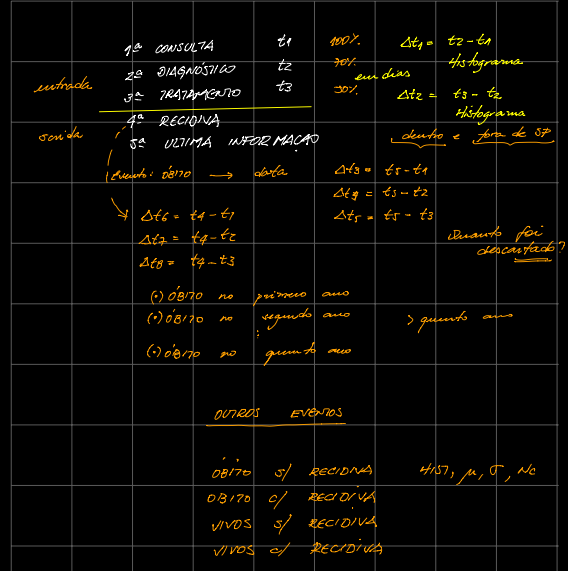

In [ ]:
df = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/colorretal_first_pp.csv')
df.head(2)

In [ ]:
# NULL! to NaN
df.loc[df.DTRECIDIVA == '#NULL!', 'DTRECIDIVA'] = np.nan
df.loc[df.DTTRAT == '#NULL!', 'DTTRAT'] = np.nan
df.loc[df.DTULTINFO == '#NULL!', 'DTULTINFO'] = np.nan

In [ ]:
# Dates - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
lista_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA']
df[lista_datas].isna().sum()

In [ ]:
df[lista_datas].head(10)

## **Date difference columns**

The differences between the dates of consultation, diagnosis and treatment will be calculated, and then the difference between the date of recurrence and last information and the first three.

This process will be performed by the function `get_dates_diff`, which drops the empty rows of the `DTTRAT` and `DTULTINFO` columns, converts the date columns to the datetime format and then calculates the difference between the dates in days. 

The idea is presented below.


> See the full function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General).

**Date columns**

* Consultation - $t_1$

* Diagnosis - $t_2$

* Treatment - $t_3$

* Recurrence - $t_4$

* Last information - $t_5$

---

**Difference, in days, between dates:**

$$CONSDIAG = t_2 - t_1$$

$$DIAGTRAT = t_3 - t_2$$

$$TRATCONS = t_3 - t_1$$

**Last information:**

$$ULTICONS = t_5 - t_1$$

$$ULTIDIAG = t_5 - t_2$$

$$ULTITRAT = t_5 - t_3$$

In [ ]:
dates = ['CONSDIAG', 'DIAGTRAT', 'TRATCONS', 'ULTICONS', 'ULTIDIAG', 'ULTITRAT']

New columns with the dates difference

In [ ]:
df = get_dates_diff(df, lista_datas)
print(df.shape)
df[dates].head(3)

In [ ]:
df.head(3)

## **Histograms**

In [ ]:
fig = px.histogram(df, x='CONSDIAG', marginal='box',
                   title='Diferença de dias entre diagnóstico e consulta')
fig.show(config = {'staticPlot': True})

In [ ]:
fig = px.histogram(df, x='DIAGTRAT', marginal='box',
                   title='Diferença de dias entre tratamento e diagnóstico')
fig.show(config = {'staticPlot': True})

In [ ]:
fig = px.histogram(df, x='TRATCONS', marginal='box', 
                   title='Diferença de dias entre tratamento e consulta')
fig.show(config = {'staticPlot': True})

In [ ]:
fig = px.histogram(df, x='ULTICONS', marginal='box',
                   title='Diferença de dias entre última informação e consulta')
fig.show(config = {'staticPlot': True})

In [ ]:
fig = px.histogram(df, x='ULTIDIAG', marginal='box',
                   title='Diferença de dias entre última informação e diagnóstico')
fig.show(config = {'staticPlot': True})

In [ ]:
fig = px.histogram(df, x='ULTITRAT', marginal='box', 
                   title='Diferença de dias entre última informação e tratamento')
fig.show(config = {'staticPlot': True})

## **Creation of death label**

In this section, labels will be created based on the latest information, one column only if the person died or not (`obito_geral`) and one for death by cancer (`obito_cancer`)
Another three columns will have the information about how many years after the diagnosis the person lived (`vivo_ano1`, `vivo_ano3`, `vivo_ano5`). 

After creating the columns, the datasets will be saved in csv files, one for São Paulo and one for the other states.

> This process will be performed by the `get_labels` function, see the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General) to see the complete function.

**Death labels**

* Death at any time - obito_geral;

* Death by cancer - obito_cancer;

* Patient is alive after one year - vivo_ano1;

* Patient is alive after three years - vivo_ano3;

* Patient is alive after five years - vivo_ano5.
---

**Last information**

1 - Alive with cancer

2 - Alive, without other specifications

3 - Death by cancer

4 - Death by other causes


In [ ]:
df.head(2)

In [ ]:
df.ULTINFO.value_counts()

In [ ]:
df = get_labels(df)
df.shape

In [ ]:
columns = ['ULTINFO', 'obito_geral', 'obito_cancer', 'vivo_ano1', 'vivo_ano3', 'vivo_ano5']

df[columns].head(2)

In [ ]:
df[columns][df.obito_geral == 0].head(10)

## **Inputer ESCOLARI**

In [ ]:
cols = ['ESCOLARI', 'IDADE', 'ECGRUP', 'SEXO']
df_esc = df[cols].copy()
df_esc.head(3)

In [ ]:
df_esc.loc[df_esc.ESCOLARI == 9, 'ESCOLARI'] = np.nan
df_esc.loc[df_esc.ECGRUP == 'I', 'ECGRUP'] = 1
df_esc.loc[df_esc.ECGRUP == 'II', 'ECGRUP'] = 2
df_esc.loc[df_esc.ECGRUP == 'III', 'ECGRUP'] = 3
df_esc.loc[df_esc.ECGRUP == 'IV', 'ECGRUP'] = 4
df_esc.ESCOLARI.value_counts(dropna=False)

In [ ]:
from sklearn.impute import KNNImputer

X = df_esc.values
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_esc.ESCOLARI = imputer.fit_transform(X)
df_esc.head(3)

In [ ]:
df['ESCOLARI_2'] = df_esc.ESCOLARI.round()
df.ESCOLARI_2.value_counts(dropna=False)

In [ ]:
df.ESCOLARI.value_counts()

In [ ]:
save_csv(df, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/colorretal_sp_labels.csv')

## **Creation of recurrence labels**

In this section, labels will be created based on the recurrence, two columns for people who died, one without recurrence and one with recurrence, and two for people who are alive, also one without recurrence and one with recurrence. 

After creating the columns, the datasets will be saved in csv files, one for São Paulo and one for the other states, now both datasets have 94 columns. 

> This process will be performed by the `get_labels_rec` function, see the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General) to see the complete function.

**Recurrence labels**

* Death without recurrence - ob_sem_rec;

* Death with recurrence - ob_com_rec;

* Alive without recurrence - vivo_sem_rec;

* Alive with recurrence - vivo_com_rec.

---

**Last information**

1 - Alive with cancer

2 - Alive, without other specifications

3 - Death by cancer

4 - Death by other causes


In [ ]:
# df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')

In [ ]:
# df_SP.head(2)

In [ ]:
# df_SP = get_label_rec(df_SP)

In [ ]:
# columns = ['RECNENHUM', 'obito_geral', 'obito_cancer', 'ob_com_rec', 'ob_sem_rec',
        #    'vivo_com_rec', 'vivo_sem_rec']
# df_SP[columns].head()

In [ ]:
# save_csv(df_SP, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')

## **Verificação dos dados criados**

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/colorretal_sp_labels.csv')

In [ ]:
df_SP.head(2)

### **Features das datas**

**Date columns**

* Consultation - $t_1$

* Diagnosis - $t_2$

* Treatment - $t_3$

* Recurrence - $t_4$

* Last information - $t_5$

---

**Difference, in days, between dates:**

$$CONSDIAG = t_2 - t_1$$

$$DIAGTRAT = t_3 - t_2$$

$$TRATCONS = t_3 - t_1$$

**Recurrence:**

$$RECCONS = t_4 - t_1$$

$$RECDIAG = t_4 - t_2$$

$$RECTRAT = t_4 - t_3$$

**Last information:**

$$ULTICONS = t_5 - t_1$$

$$ULTIDIAG = t_5 - t_2$$

$$ULTITRAT = t_5 - t_3$$

**SP**

In [ ]:
# Diagnóstico antes da consulta
df_SP[df_SP.CONSDIAG < 0].shape

In [ ]:
# Tratamento antes do diagnóstico
df_SP[df_SP.DIAGTRAT < 0].shape

In [ ]:
# Tratamento antes da consulta
df_SP[df_SP.TRATCONS < 0].shape

In [ ]:
# Última informação antes da consulta
df_SP[df_SP.ULTICONS < 0].shape

In [ ]:
# Última informação antes do diagnóstico
df_SP[df_SP.ULTIDIAG < 0].shape

In [ ]:
df_SP[df_SP.ULTIDIAG > 365].shape

In [ ]:
df_SP[df_SP.ULTIDIAG > 365*3].shape

In [ ]:
df_SP[df_SP.ULTIDIAG > 365*5].shape

In [ ]:
# Última informação antes do tratamento
df_SP[df_SP.ULTITRAT < 0].shape

### **Labels óbito**
* Óbito em qualquer momento - ob

* Patient is alive after one year - vivo_ano1;

* Patient is alive after three years - vivo_ano3;

* Patient is alive after five years - vivo_ano5;

**SP**

In [ ]:
df_SP.obito_geral.value_counts()

In [ ]:
df_SP.obito_cancer.value_counts()

In [ ]:
df_SP.vivo_ano1.value_counts()

In [ ]:
df_SP.vivo_ano3.value_counts()

In [ ]:
df_SP.vivo_ano5.value_counts()

In [ ]:
df_SP[(df_SP.obito_geral == 0) & (df_SP.vivo_ano1 == 0) & (df_SP.vivo_ano3 == 0) & (df_SP.vivo_ano5 == 0)].shape

In [ ]:
df_SP[(df_SP.obito_geral == 0) & (df_SP.vivo_ano1 == 1) & (df_SP.vivo_ano3 == 0) & (df_SP.vivo_ano5 == 0)].shape

In [ ]:
df_SP[(df_SP.obito_geral == 0) & (df_SP.vivo_ano1 == 1) & (df_SP.vivo_ano3 == 1) & (df_SP.vivo_ano5 == 0)].shape

### **Labels recidiva**
* Óbito sem recidiva - ob_sem_rec

* Óbito com recidiva - ob_com_rec

* Vivos sem recidiva - vivo_sem_rec

* Vivos com recidiva - vivo_com_rec
---


**SP**

In [ ]:
# df_SP.ob_sem_rec.value_counts()

In [ ]:
# df_SP.ob_com_rec.value_counts()

In [ ]:
# df_SP.vivo_sem_rec.value_counts()

In [ ]:
# df_SP.vivo_com_rec.value_counts()

# **Informações**

In [ ]:
def percent_surv(df):
    """
    """
    df_aux = df.copy()
    df_aux['meses_trat'] = (df_aux['ULTITRAT']/30).round()
    df_aux = (df_aux.groupby(by=['meses_trat'])['obito_geral'].sum()/df_aux.shape[0]).reset_index()

    soma = 1
    val = df_aux['obito_geral'].values.copy()
    for i in range(df_aux.shape[0]):
        soma -= df_aux.obito_geral[i]
        val[i] = soma
        
    df_aux['perc'] = val

    return df_aux

In [ ]:
%%capture

!pip install pandas-profiling -U

from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df.copy())
profile.to_notebook_iframe()

In [ ]:
df = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/colorretal_sp_labels.csv')

In [ ]:
df.head(3)

In [ ]:
df.obito_geral.value_counts(True)

In [ ]:
df_surv = percent_surv(df)
df_surv.head(3)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_surv.meses_trat[2:], df_surv.perc[2:], color='k')
plt.xlabel('Months', size=14)
plt.xticks(np.linspace(0, 260, 14))
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel('Percentage of survival', size=14)
# plt.title('Time (in days) between consultation and diagnosis for each year', size=16)
plt.ylim([0, 1.])
plt.vlines(12, 0, 1, colors='b', label='one year', linestyle='dotted')
plt.vlines(36, 0, 1, colors='gray', label='three years', linestyle='dotted')
plt.vlines(60, 0, 1, colors='r', label='five years', linestyle='dotted')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

In [ ]:
fig = go.Figure(data=go.Scatter(x=df_surv.meses_trat[2:], y=df_surv.perc[2:]))
fig.show()

In [ ]:
# 12 = 0.7666
# 24 = 0.6595
# 36 = 0.5950

In [ ]:
df.ECGRUP.unique()

In [ ]:
df_1 = df.query("ECGRUP == 'I'")
df_surv1 = percent_surv(df_1)
df_surv1.head(3)

In [ ]:
df_2 = df.query("ECGRUP == 'II'")
df_surv2 = percent_surv(df_2)
df_surv2.head(3)

In [ ]:
df_3 = df.query("ECGRUP == 'III'")
df_surv3 = percent_surv(df_3)
df_surv3 = df_surv3.query("meses_trat >= 0")
df_surv3.head(3)

In [ ]:
df_4 = df.query("ECGRUP == 'IV'")
df_surv4 = percent_surv(df_4)
df_surv4 = df_surv4.query("meses_trat >= 0")
df_surv4.head(3)

In [ ]:
# 'solid', 'dashed', 'dashdot', 'dotted'

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_surv1.meses_trat, df_surv1.perc, color='k', label='ECGRUP = I', linestyle='dashed')
plt.plot(df_surv2.meses_trat, df_surv2.perc, color='k', label='ECGRUP = II', linestyle='dashdot')
plt.plot(df_surv3.meses_trat, df_surv3.perc, color='k', label='ECGRUP = III', linestyle='dotted')
plt.plot(df_surv4.meses_trat, df_surv4.perc, color='k', label='ECGRUP = IV')

plt.xlabel('Months', size=14)
plt.xticks(np.linspace(0, 260, 14))
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel('Percentage of survival', size=14)
# plt.title('Time (in days) between consultation and diagnosis for each year', size=16)

plt.vlines(12, 0, 1, colors='b', #label='one year', 
           linestyle='dotted')
plt.vlines(36, 0, 1, colors='gray', #label='three years', 
           linestyle='dotted')
plt.vlines(60, 0, 1, colors='r', #label='five years', 
           linestyle='dotted')

plt.ylim([0, 1.])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

In [ ]:
x_num, _, _, _ = train_preprocessing(df)

In [ ]:
df_num = pd.DataFrame(x_num, columns=df.columns)
df_num.head(2)

In [ ]:
corr_matrix = df_num.corr()
fig, ax = plt.subplots(figsize = (20, 15))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
sns.heatmap(corr_matrix, cmap = colormap, mask = mask, annot = True, fmt = '.2f')
fig.show()

In [ ]:
# corr_matrix = df_num.corr()
fig, ax = plt.subplots(figsize = (15, 10))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
sns.heatmap(corr_matrix, cmap = colormap, mask = mask)# annot = True, fmt = '.2f')
fig.show()

In [ ]:
feat = ['IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV', 'EC', 'TRATHOSP', 
        'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO',
        'OUTROS', 'NENHUMANT', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'ANODIAG',
        'DRS', 'RRAS', 'RECNENHUM', 'IBGEATEN', 'ESCOLARI_2']
        
len(feat)

In [ ]:
df[feat].head(2)

In [ ]:
x, _, _, _ = train_preprocessing(df[feat])

In [ ]:
x.shape

In [ ]:
%%capture

!pip install scipy -U

In [ ]:
# 'obito_cancer', 'obito_geral', 'vivo_ano1', 'vivo_ano3', 'vivo_ano5'

In [ ]:
for col in range(0, 25):
    chisqt = pd.crosstab(x[:, col], df['vivo_ano5'], margins=True)
    value = []

    for i in range(chisqt.shape[0] - 1):
        value.append(chisqt.iloc[i].values)

    print(f'{df[feat].columns[col]}: {chi2_contingency(np.array(value))[1]}')

In [ ]:
# from scipy.stats import chi2_contingency

# chisqt = pd.crosstab(df.SEXO, df['vivo_ano5'], margins=True)

# value = np.array([chisqt.iloc[0][0:5].values,
#                   chisqt.iloc[1][0:5].values])

# print(chi2_contingency(value)[0:3])

In [ ]:
def variables_preprocessing2(df, dates_list):
    """Do some preprocessing on the DataFrame like strings splits, fill NaN values,
        replace values and drop some columns.

    :param df pd.DataFrame: DataFrame to be preprocessed.

    :return: DataFrame after be preprocessed and get some columns removed
    :rtype: pd.DataFrame
    """

    df_aux = df.copy()
    no_info = '**Sem informação**'

    # DRS
    DRS_expand = df_aux.DRS.str.split(' ', expand=True)
    df_aux['DRS'] = DRS_expand[1]
    df_aux.DRS.fillna('0', inplace=True)

    df_aux.dropna(subset=['DTTRAT', 'DTULTINFO'], inplace=True)
    
    for c in dates_list:
        if c in ['DTTRAT', 'DTULTINFO', 'DTRECIDIVA']: # Has a different date format 
            fmt = '%Y-%m-%d %H:%M:%S'
        else:
            fmt = '%Y-%m-%d'
        df_aux[c] = pd.to_datetime(df_aux[c], format=fmt)
        
    df_aux['CONSDIAG'] = (df_aux.DTDIAG - df_aux.DTCONSULT).dt.days
    df_aux['DIAGTRAT'] = (df_aux.DTTRAT - df_aux.DTDIAG).dt.days
    df_aux['TRATCONS'] = (df_aux.DTTRAT - df_aux.DTCONSULT).dt.days

    df_aux['ULTICONS'] = (df_aux.DTULTINFO - df_aux.DTCONSULT).dt.days
    df_aux['ULTIDIAG'] = (df_aux.DTULTINFO - df_aux.DTDIAG).dt.days
    df_aux['ULTITRAT'] = (df_aux.DTULTINFO - df_aux.DTTRAT).dt.days

    df_aux['obito_geral'] = 0
    df_aux['obito_cancer'] = 0

    df_aux['vivo_ano1'] = 0
    df_aux['vivo_ano3'] = 0
    df_aux['vivo_ano5'] = 0 
    
    df_aux.loc[df_aux.ULTINFO > 2, 'obito_geral'] = 1

    df_aux.loc[df_aux.ULTINFO == 3, 'obito_cancer'] = 1

    df_aux.loc[df_aux.ULTIDIAG > 365, 'vivo_ano1'] = 1
    df_aux.loc[df_aux.ULTIDIAG > 3*365, 'vivo_ano3'] = 1
    df_aux.loc[df_aux.ULTIDIAG > 5*365, 'vivo_ano5'] = 1

    col = df_aux.columns
    drop_cols = ['REC04', 'META01', 'META02', 'META03', 'META04', 'REC01', 
                 'REC02', 'REC03', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 
                 'DTRECIDIVA', 'DESCTOPO', 'DESCMORFO', 'CIDADE']

    col = col.drop(drop_cols)

    return df_aux[col]

In [ ]:
path = '/content/drive/MyDrive/Trabalho/Cancer/Datasets/ANALITICO_Colorretal_lucas.csv'

df_total = read_csv(path, drop_id=True)

# #NULL! to NaN
df_total.loc[df_total.DTRECIDIVA == '#NULL!', 'DTRECIDIVA'] = np.nan
df_total.loc[df_total.DTULTINFO == '#NULL!', 'DTULTINFO'] = np.nan
df_total.loc[df_total.DTTRAT == '#NULL!', 'DTTRAT'] = np.nan

df_limpo = variables_preprocessing2(df_total, ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA'])
df_limpo.head(2)

In [ ]:
from sklearn.decomposition import PCA

x_tot, _, _ = train_preprocessing(df_limpo)

pca = PCA()
principalComponents = pca.fit_transform(x_tot)

In [ ]:
plt.figure(figsize=(15, 8))

plt.bar(np.linspace(1, x_tot.shape[1], x_tot.shape[1]), 
        pca.explained_variance_ratio_, alpha=0.5, align='center', 
        label='Variance ratio')
plt.step(np.linspace(1, x_tot.shape[1], x_tot.shape[1]), 
         np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Sum of explained variance ratio')

plt.ylabel('Explained variance', size=14)
plt.xlabel('Number of principal components', size=14)
plt.legend()

plt.show()

In [ ]:
drop_cols = ['UFRESID', 'UFNASC', 'TMOAPOS']

df_ret1 = df_limpo.drop(columns=drop_cols)
df_ret1.head(2)

In [ ]:
x_ret1, _, _ = train_preprocessing(df_ret1)

# pca = PCA()
principalComponents = pca.fit_transform(x_ret1)

In [ ]:
plt.figure(figsize=(15, 8))

plt.bar(np.linspace(1, x_ret1.shape[1], x_ret1.shape[1]), 
        pca.explained_variance_ratio_, alpha=0.5, align='center', 
        label='Variance ratio')
plt.step(np.linspace(1, x_ret1.shape[1], x_ret1.shape[1]), 
         np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Sum of explained variance ratio')

plt.ylabel('Explained variance', size=14)
plt.xlabel('Number of principal components', size=14)
plt.legend()

plt.show()

In [ ]:
drop = ['TOPO', 'TOPOGRUP', 'T', 'N', 'M', 'NAOTRAT', 'TRATAMENTO', 'TRATFAPOS',
        'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 
        'IMUNOAPOS', 'OUTROAPOS', 'RECLOCAL', 'RECREGIO', 'RECDIST', 'HABILIT']

df_ret2 = df_ret1.drop(columns=drop)
df_ret2.head(2)

In [ ]:
x_ret2, _, _ = train_preprocessing(df_ret2)

# pca = PCA()
principalComponents = pca.fit_transform(x_ret2)

In [ ]:
plt.figure(figsize=(15, 8))

plt.bar(np.linspace(1, x_ret2.shape[1], x_ret2.shape[1]), 
        pca.explained_variance_ratio_, alpha=0.5, align='center', 
        label='Variance ratio')
plt.step(np.linspace(1, x_ret2.shape[1], x_ret2.shape[1]), 
         np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Sum of explained variance ratio')

plt.ylabel('Explained variance', size=14)
plt.xlabel('Number of principal components', size=14)
plt.legend()

plt.show()